In [9]:
import numpy as np
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Twitter API Keys
consumer_key = "2oHJCPZyjSelmsyxiXP4JHL3v"
consumer_secret = "ZgEY3CBs2AWbmrjUP6j43dLnI0b4qrbFGTrHip5WENTHBd4FKf"
access_token = "1046431074501500928-hM2FfKWMrqTX3Uuf8Ly8g7VoEZPjnZ"
access_token_secret = "Br5L7WYvjIk0u9sZ97dlWkCDxulhEyDLrWs85SJ7AoH2U"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [25]:
outlets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]
sentiment_array = []
sentiment_array_avg = []

for outlet in outlets:
    counter = 1
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []

    for x in range(5):

        public_tweets = api.user_timeline(outlet, page = x)
        print(public_tweets)
        for tweet in public_tweets:
            text = tweet["text"]

            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            counter += 1
    sentiments =  {"Outlet": outlet,
                   "Compound Score": compound_list,
                   "Positive Score": positive_list,
                   "Negative Score": negative_list,
                   "Neutral Score": neutral_list,
                   "Tweets Ago": tweets_ago}

    sentiment_array_avg.append({"Outlet": outlet,
                                "Compound Score": np.average(compound_list),
                                "Positive Score": np.average(positive_list),
                                "Negative Score": np.average(negative_list),
                                "Neutral Score": np.average(neutral_list)})

    #sentiment_array.append(sentiments)

[{'created_at': 'Mon Oct 01 00:04:15 +0000 2018', 'id': 1046551327046864897, 'id_str': '1046551327046864897', 'text': 'Five things to know for the week ahead https://t.co/XnoIeOXqAq', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/XnoIeOXqAq', 'expanded_url': 'https://bbc.in/2NWP9Je', 'display_url': 'bbc.in/2NWP9Je', 'indices': [39, 62]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'url': {'urls': [{'u

[{'created_at': 'Mon Oct 01 00:04:15 +0000 2018', 'id': 1046551327046864897, 'id_str': '1046551327046864897', 'text': 'Five things to know for the week ahead https://t.co/XnoIeOXqAq', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/XnoIeOXqAq', 'expanded_url': 'https://bbc.in/2NWP9Je', 'display_url': 'bbc.in/2NWP9Je', 'indices': [39, 62]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'url': {'urls': [{'u

[{'created_at': 'Sun Sep 30 05:18:22 +0000 2018', 'id': 1046267992852582400, 'id_str': '1046267992852582400', 'text': 'Jair Bolsonaro: Large protests against Brazil election front-runner https://t.co/qgfMYWdpgE', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/qgfMYWdpgE', 'expanded_url': 'https://bbc.in/2NVksnK', 'display_url': 'bbc.in/2NVksnK', 'indices': [68, 91]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'ent

[{'created_at': 'Sat Sep 29 09:14:52 +0000 2018', 'id': 1045965122223702016, 'id_str': '1045965122223702016', 'text': 'The woman who challenged US senator Flake in a lift: "He had to confront the pain and rage that women feel"\n(Tap to… https://t.co/1hlUOcDdxY', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/1hlUOcDdxY', 'expanded_url': 'https://twitter.com/i/web/status/1045965122223702016', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBrea

[{'created_at': 'Fri Sep 28 18:23:01 +0000 2018', 'id': 1045740678553227265, 'id_str': '1045740678553227265', 'text': "RT @BBCJamesCook: BREAKING President Trump says he has no plan to replace his Supreme Court nominee but describes Brett Kavanaugh's accuser…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BBCJamesCook', 'name': 'James Cook', 'id': 17024780, 'id_str': '17024780', 'indices': [3, 16]}], 'urls': []}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @B

[{'created_at': 'Sun Sep 30 23:59:51 +0000 2018', 'id': 1046550222569189378, 'id_str': '1046550222569189378', 'text': 'More than a year after Hurricane Maria made landfall, Puerto Rico still has a backlog of dead bodies – some of whic… https://t.co/0K6wWmyKDe', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0K6wWmyKDe', 'expanded_url': 'https://twitter.com/i/web/status/1046550222569189378', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.co/VGut7r2Vg5', 'en

[{'created_at': 'Sun Sep 30 23:59:51 +0000 2018', 'id': 1046550222569189378, 'id_str': '1046550222569189378', 'text': 'More than a year after Hurricane Maria made landfall, Puerto Rico still has a backlog of dead bodies – some of whic… https://t.co/0K6wWmyKDe', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0K6wWmyKDe', 'expanded_url': 'https://twitter.com/i/web/status/1046550222569189378', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.co/VGut7r2Vg5', 'en

[{'created_at': 'Sun Sep 30 15:31:27 +0000 2018', 'id': 1046422277636657152, 'id_str': '1046422277636657152', 'text': 'Iranian Foreign Minister Javad Zarif tells @FaceTheNation that President Trump is a "bully": "The United States is… https://t.co/8v5x3pqYHU', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FaceTheNation', 'name': 'Face The Nation', 'id': 205392468, 'id_str': '205392468', 'indices': [43, 57]}], 'urls': [{'url': 'https://t.co/8v5x3pqYHU', 'expanded_url': 'https://twitter.com/i/web/status/1046422277636657152', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://www.snapstream.com" rel="nofollow">SnapStream TV Search</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'loc

[{'created_at': 'Sun Sep 30 11:18:04 +0000 2018', 'id': 1046358510672510976, 'id_str': '1046358510672510976', 'text': 'Former Massachusetts state senator found dead before his corruption trial https://t.co/T121cdzMFP https://t.co/YIVDyHqPfM', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/T121cdzMFP', 'expanded_url': 'https://cbsn.ws/2Ncas45', 'display_url': 'cbsn.ws/2Ncas45', 'indices': [74, 97]}], 'media': [{'id': 1046358509078679552, 'id_str': '1046358509078679552', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/media/DoVphSlXkAA2AQu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoVphSlXkAA2AQu.jpg', 'url': 'https://t.co/YIVDyHqPfM', 'display_url': 'pic.twitter.com/YIVDyHqPfM', 'expanded_url': 'https://twitter.com/CBSNews/status/1046358510672510976/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 357, 'resize': 'fit'}, 'medium': {'w': 1

[{'created_at': 'Sun Sep 30 06:18:04 +0000 2018', 'id': 1046283014844690432, 'id_str': '1046283014844690432', 'text': 'Texas man executed for running over girlfriend in jealous rage https://t.co/7NUDe5sOLd https://t.co/z8dTau3n3R', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/7NUDe5sOLd', 'expanded_url': 'https://cbsn.ws/2QjPVg6', 'display_url': 'cbsn.ws/2QjPVg6', 'indices': [63, 86]}], 'media': [{'id': 1046283012948733952, 'id_str': '1046283012948733952', 'indices': [87, 110], 'media_url': 'http://pbs.twimg.com/media/DoUk21lVsAAqap6.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoUk21lVsAAqap6.jpg', 'url': 'https://t.co/z8dTau3n3R', 'display_url': 'pic.twitter.com/z8dTau3n3R', 'expanded_url': 'https://twitter.com/CBSNews/status/1046283014844690432/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1024, 'h': 538, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1024, 'h': 

[{'created_at': 'Mon Oct 01 00:01:05 +0000 2018', 'id': 1046550533429972993, 'id_str': '1046550533429972993', 'text': 'This is how the FBI will investigate the allegations against Brett Kavanaugh https://t.co/ApyXUk74Nn https://t.co/dyPwiXneXk', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ApyXUk74Nn', 'expanded_url': 'https://cnn.it/2NPxaEl', 'display_url': 'cnn.it/2NPxaEl', 'indices': [77, 100]}], 'media': [{'id': 1046550531521609729, 'id_str': '1046550531521609729', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/DoYYKd7XgAE5M19.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoYYKd7XgAE5M19.jpg', 'url': 'https://t.co/dyPwiXneXk', 'display_url': 'pic.twitter.com/dyPwiXneXk', 'expanded_url': 'https://twitter.com/CNN/status/1046550533429972993/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1100, 'h': 619, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 68

[{'created_at': 'Mon Oct 01 00:01:05 +0000 2018', 'id': 1046550533429972993, 'id_str': '1046550533429972993', 'text': 'This is how the FBI will investigate the allegations against Brett Kavanaugh https://t.co/ApyXUk74Nn https://t.co/dyPwiXneXk', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ApyXUk74Nn', 'expanded_url': 'https://cnn.it/2NPxaEl', 'display_url': 'cnn.it/2NPxaEl', 'indices': [77, 100]}], 'media': [{'id': 1046550531521609729, 'id_str': '1046550531521609729', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/DoYYKd7XgAE5M19.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoYYKd7XgAE5M19.jpg', 'url': 'https://t.co/dyPwiXneXk', 'display_url': 'pic.twitter.com/dyPwiXneXk', 'expanded_url': 'https://twitter.com/CNN/status/1046550533429972993/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1100, 'h': 619, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 68

[{'created_at': 'Sun Sep 30 21:01:08 +0000 2018', 'id': 1046505246653067264, 'id_str': '1046505246653067264', 'text': 'Europe wins the #RyderCup after beating the US in France https://t.co/thLG8RQbfF https://t.co/AXdEipTvgw', 'truncated': False, 'entities': {'hashtags': [{'text': 'RyderCup', 'indices': [16, 25]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/thLG8RQbfF', 'expanded_url': 'https://cnn.it/2Ncne2s', 'display_url': 'cnn.it/2Ncne2s', 'indices': [57, 80]}], 'media': [{'id': 1046505244396408832, 'id_str': '1046505244396408832', 'indices': [81, 104], 'media_url': 'http://pbs.twimg.com/media/DoXu-aPU0AAkdfM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoXu-aPU0AAkdfM.jpg', 'url': 'https://t.co/AXdEipTvgw', 'display_url': 'pic.twitter.com/AXdEipTvgw', 'expanded_url': 'https://twitter.com/CNN/status/1046505246653067264/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 780, 'h': 438, 'resize': 'fit'}

[{'created_at': 'Sun Sep 30 16:46:04 +0000 2018', 'id': 1046441056122916866, 'id_str': '1046441056122916866', 'text': 'An air traffic controller is being hailed as a hero following a devastating earthquake and tsunami in Indonesia.\n\nH… https://t.co/SSL5H2Kusm', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/SSL5H2Kusm', 'expanded_url': 'https://twitter.com/i/web/status/1046441056122916866', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNB

[{'created_at': 'Sun Sep 30 13:31:00 +0000 2018', 'id': 1046391965921632257, 'id_str': '1046391965921632257', 'text': '"What is... yes?" A "Jeopardy!" contestant surprised his girlfriend with a marriage proposal https://t.co/tey6M73f73 https://t.co/bwZTYkoQ8h', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tey6M73f73', 'expanded_url': 'https://cnn.it/2R5Hp5n', 'display_url': 'cnn.it/2R5Hp5n', 'indices': [93, 116]}], 'media': [{'id': 1045712016235737088, 'id_str': '1045712016235737088', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1045712016235737088/img/xiQUJPCfLgyjBaK7.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1045712016235737088/img/xiQUJPCfLgyjBaK7.jpg', 'url': 'https://t.co/bwZTYkoQ8h', 'display_url': 'pic.twitter.com/bwZTYkoQ8h', 'expanded_url': 'https://twitter.com/CNN/status/1046391965921632257/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, '

[{'created_at': 'Mon Oct 01 00:09:25 +0000 2018', 'id': 1046552627591417856, 'id_str': '1046552627591417856', 'text': 'Lindsay Lohan gets punched in the face after accusing refugee parents of trafficking, trying to take the kids. https://t.co/NnLJMQhAAL', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NnLJMQhAAL', 'expanded_url': 'https://fxn.ws/2DCwu0i', 'display_url': 'fxn.ws/2DCwu0i', 'indices': [111, 134]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful

[{'created_at': 'Mon Oct 01 00:09:25 +0000 2018', 'id': 1046552627591417856, 'id_str': '1046552627591417856', 'text': 'Lindsay Lohan gets punched in the face after accusing refugee parents of trafficking, trying to take the kids. https://t.co/NnLJMQhAAL', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NnLJMQhAAL', 'expanded_url': 'https://fxn.ws/2DCwu0i', 'display_url': 'fxn.ws/2DCwu0i', 'indices': [111, 134]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful

[{'created_at': 'Sun Sep 30 21:05:00 +0000 2018', 'id': 1046506218984865792, 'id_str': '1046506218984865792', 'text': "'Be Bold in Your Conviction': KY Gov. @MattBevin Discusses Campaign Strategy on 'Life, Liberty &amp; Levin' https://t.co/Dw94Jas7vE", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MattBevin', 'name': 'Matt Bevin', 'id': 1404269089, 'id_str': '1404269089', 'indices': [38, 48]}], 'urls': [{'url': 'https://t.co/Dw94Jas7vE', 'expanded_url': 'http://bit.ly/2xP3SMa', 'display_url': 'bit.ly/2xP3SMa', 'indices': [108, 131]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Stronges

[{'created_at': 'Sun Sep 30 17:56:00 +0000 2018', 'id': 1046458655439290375, 'id_str': '1046458655439290375', 'text': '.@anitakumar01: "They really do want Canada involved, and so that\'s why you\'re seeing them make this last-minute pu… https://t.co/JdL2hMP12T', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'anitakumar01', 'name': 'Anita Kumar', 'id': 48581849, 'id_str': '48581849', 'indices': [1, 14]}], 'urls': [{'url': 'https://t.co/JdL2hMP12T', 'expanded_url': 'https://twitter.com/i/web/status/1046458655439290375', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A

[{'created_at': 'Sun Sep 30 15:00:01 +0000 2018', 'id': 1046414368727080960, 'id_str': '1046414368727080960', 'text': '.@FLOTUS departs for Africa Monday https://t.co/w527lNUdO8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FLOTUS', 'name': 'Melania Trump', 'id': 818876014390603776, 'id_str': '818876014390603776', 'indices': [1, 8]}], 'urls': [], 'media': [{'id': 1046390782545088512, 'id_str': '1046390782545088512', 'indices': [35, 58], 'media_url': 'http://pbs.twimg.com/media/DoWG32nX0AAgDKp.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DoWG32nX0AAgDKp.jpg', 'url': 'https://t.co/w527lNUdO8', 'display_url': 'pic.twitter.com/w527lNUdO8', 'expanded_url': 'https://twitter.com/FoxNews/status/1046414368727080960/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resi

[{'created_at': 'Mon Oct 01 00:03:10 +0000 2018', 'id': 1046551057407627264, 'id_str': '1046551057407627264', 'text': 'If there was a moment tailor-made for a new book about women and rage, it would be now. And Rebecca Traister, a col… https://t.co/tUMiIBGhKE', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tUMiIBGhKE', 'expanded_url': 'https://twitter.com/i/web/status/1046551057407627264', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of o

[{'created_at': 'Mon Oct 01 00:03:10 +0000 2018', 'id': 1046551057407627264, 'id_str': '1046551057407627264', 'text': 'If there was a moment tailor-made for a new book about women and rage, it would be now. And Rebecca Traister, a col… https://t.co/tUMiIBGhKE', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tUMiIBGhKE', 'expanded_url': 'https://twitter.com/i/web/status/1046551057407627264', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of o

[{'created_at': 'Sun Sep 30 20:31:03 +0000 2018', 'id': 1046497677402226688, 'id_str': '1046497677402226688', 'text': 'Democrats have cast the initial list of 4 witnesses to be interviewed in the Kavanaugh FBI probe as not being enoug… https://t.co/M8uKRRov9O', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/M8uKRRov9O', 'expanded_url': 'https://twitter.com/i/web/status/1046497677402226688', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of o

[{'created_at': 'Sun Sep 30 15:28:22 +0000 2018', 'id': 1046421502873268224, 'id_str': '1046421502873268224', 'text': '4 airlines —\xa0including Delta and American Airlines —\xa0are charging more for checked bags. But a few tricks can help… https://t.co/nqHABI6f0u', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/nqHABI6f0u', 'expanded_url': 'https://twitter.com/i/web/status/1046421502873268224', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs

[{'created_at': 'Sun Sep 30 10:42:52 +0000 2018', 'id': 1046349656001826816, 'id_str': '1046349656001826816', 'text': 'Matt Damon Plays Brett Kavanaugh in ‘S.N.L.’ Season Premiere https://t.co/3CqD7Aftmi', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/3CqD7Aftmi', 'expanded_url': 'https://nyti.ms/2NaILsn', 'display_url': 'nyti.ms/2NaILsn', 'indices': [61, 84]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our journalists and more. Visit https://t.co/ghL9OoYKMM to share news tips.', 'url': 'http://t.co/a

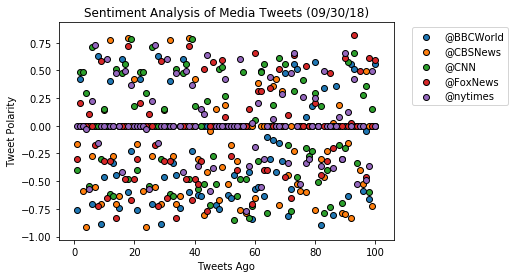

In [14]:
dfs = []
for item in sentiment_array:
    [int(x) for x in item["Tweets Ago"]]
    df = pd.DataFrame(item)
    dfs.append(df)
    plt.scatter(item["Tweets Ago"], item["Compound Score"], label = item["Outlet"], edgecolors = "black")

result = pd.concat(dfs)
result.to_csv("Sentiments.csv")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))

plt.savefig("Sentiment Analysis of Media.png")

plt.show()

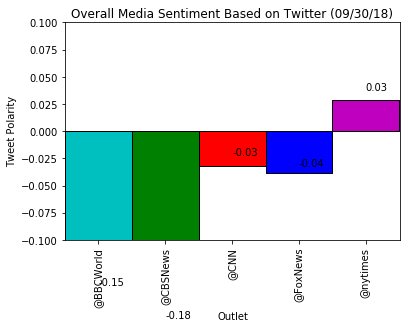

In [24]:
avg_df = pd.DataFrame.from_dict(sentiment_array_avg)

x_axis = range(len(avg_df["Outlet"]))

my_colors = ['c', 'g', 'r', 'b', 'm']

sent_ch = avg_df.plot(kind='bar', x = "Outlet", y = "Compound Score", stacked=True, edgecolor = "black",
                      linewidth = 1, width=1, color = my_colors, legend = None)

plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (%s)" % time.strftime("%x"))
plt.xlim(-.5, len(x_axis)-.49)
plt.ylim(-.1, .1)

y = round(avg_df["Compound Score"], 2)
x = range(0,len(avg_df["Outlet"]))

for a,b in zip(x, y):
    plt.text(a, b + .008, str(b))

plt.savefig("Overall Media Sentiment.png")
plt.show()